In [1]:
import h5py
import numpy as np
fh5 = h5py.File('04_Sample_Data.h5','r')
img = fh5['map']
img = np.array(img)
print(img.shape)
lab = fh5['lab']
lab = np.array(lab)
print(lab.shape)

(2880, 33, 33)
(2880,)


In [2]:
sorted_indices = np.argsort(lab)

In [3]:
sorted_lab = lab[sorted_indices]

In [4]:
sorted_img = img[sorted_indices]

In [5]:
lll = ['BLCA', 'BRCA', 'CESC', 'COAD', 'ESCA', 'GBM', 'HNSC', 'KIRP','KICH','KIRC', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC',
      'OV', 'PAAD','PRAD','PCPG','READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC','TOTAL']

In [6]:
img3 = np.zeros((len(lab), 33, 33, 3))

In [7]:
import time
from tqdm import tqdm
from tqdm._tqdm import trange

C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.std.*` instead of `tqdm._tqdm.*`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
for i in tqdm(range(len(lab))):
    time.sleep(0.01)
    for j in range(3):
        img3[i,:,:,j] = sorted_img[i,:,:]

100%|██████████| 2880/2880 [00:49<00:00, 58.51it/s]


In [9]:
img3.shape

(2880, 33, 33, 3)

In [10]:
img33 = np.uint8(img3)

In [11]:
img33.max()

255

In [12]:
img33.shape

(2880, 33, 33, 3)

(-0.5, 32.5, 32.5, -0.5)

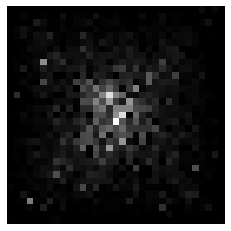

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img33[666])
plt.axis('off')

In [15]:
img333 = img33[0]

In [16]:
img333.max()

224

(-0.5, 32.5, 32.5, -0.5)

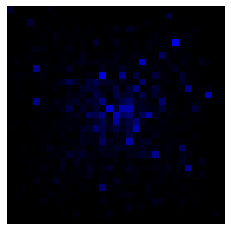

In [17]:
img333[:,:,0:2]=0 
plt.imshow(img333)
plt.axis('off')

(-0.5, 32.5, 32.5, -0.5)

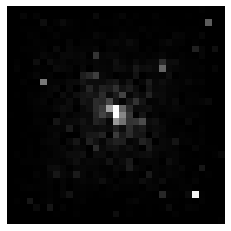

In [18]:
plt.imshow(img[0],"gray")
plt.axis('off')

In [19]:
stdall = np.mean(sorted_img,axis=0)
stdall.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

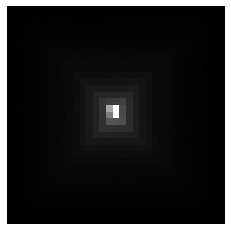

In [20]:
plt.imshow(stdall,"gray")
plt.axis('off')

In [21]:
imgcf = np.zeros((28, 33, 33, 3))
labnode = np.zeros(28)

In [22]:
m=0
for i in tqdm(range(len(lab)-1)):
    time.sleep(0.01)
    if sorted_lab[i]!=sorted_lab[i+1]:
        labnode[m+1]=i
        m=m+1

100%|██████████| 2879/2879 [00:49<00:00, 58.73it/s]


In [48]:
labnode[27]=len(lab)
labnode

array([   0.,  127.,  448.,  530.,  675.,  729.,  770.,  959.,  990.,
       1176., 1249., 1276., 1414., 1534., 1676., 1818., 1916., 1969.,
       2088., 2148., 2226., 2296., 2428., 2535., 2566., 2701., 2724.,
       2880.])

In [49]:
lab[436]

26.0

In [50]:
b = sorted_img[0:436,:,:]
b.shape

(436, 33, 33)

In [51]:
c = img3[0:436,:,:,:]
c.shape

(436, 33, 33, 3)

In [52]:
import scipy.stats as stats

In [53]:
t_statistic, p_value = stats.ttest_ind(b, sorted_img)

In [54]:
p_value.shape

(33, 33)

In [55]:
std = np.mean(b,axis=0)
std.max()

639.8407748623858

In [56]:
stda = np.mean(sorted_img,axis=0)
stda.max()

617.5106827840274

In [57]:
stdc = np.mean(c,axis=0)
stdc.max()

639.8407748623858

In [58]:
std.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

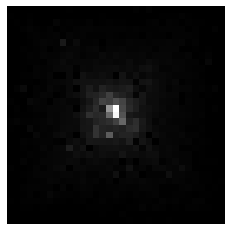

In [59]:
plt.imshow(stdc/stdc.max())
plt.axis('off')

In [60]:
for i in tqdm(range(33)):
    time.sleep(0.01)
    for j in range(33):
        if p_value[i,j]<=0.01:
            if std[i,j]>stda[i,j]:
                stdc[i,j,0:2]=0
            if std[i,j]<stda[i,j]:
                stdc[i,j,1:3]=0

100%|██████████| 33/33 [00:00<00:00, 57.13it/s]


In [61]:
stdc = np.uint8(stdc)

In [62]:
for i in tqdm(range(27)):
    x = labnode[i]
    y = labnode[i+1]+1
    img_1 = sorted_img[int(x)+1:int(y),:,:]
    img_2 = img3[int(x)+1:int(y),:,:,:]
    #print(img1.shape)
    std = np.mean(img_1,axis=0)
    stdc = np.mean(img_2,axis=0)
    t_statistic, p_value = stats.ttest_ind(img_1, sorted_img)
    for ii in range(33):
        for jj in range(33):
            if p_value[ii,jj]<=0.01:
                if std[ii,jj]>stda[ii,jj]:
                    stdc[ii,jj,0:2]=0
                if std[ii,jj]<stda[ii,jj]:
                    stdc[ii,jj,1:3]=0
    imgcf[i] =  stdc
    
    #print(std.shape)

100%|██████████| 27/27 [00:00<00:00, 57.55it/s]


In [63]:
imgcf8 = np.uint8(imgcf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 32.5, 32.5, -0.5)

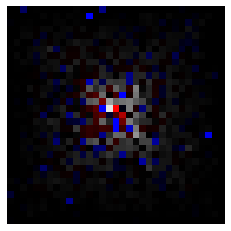

In [64]:
plt.imshow(imgcf8[7]/imgcf8[0].max())
plt.axis('off')

In [66]:
imgcf8[26].max()

198

In [67]:
imgcfg = np.zeros((28, 33, 33, 3))

In [68]:
imgcfg = imgcf8

(-0.5, 32.5, 32.5, -0.5)

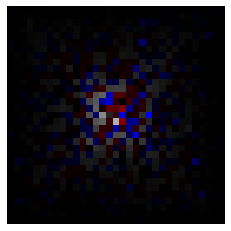

In [69]:
plt.imshow(imgcfg[17])
plt.axis('off')

In [70]:
imgcfg[27]=0

In [71]:
for j in range(3):
    imgcfg[27,:,:,j] = stdall/stdall.max()*255

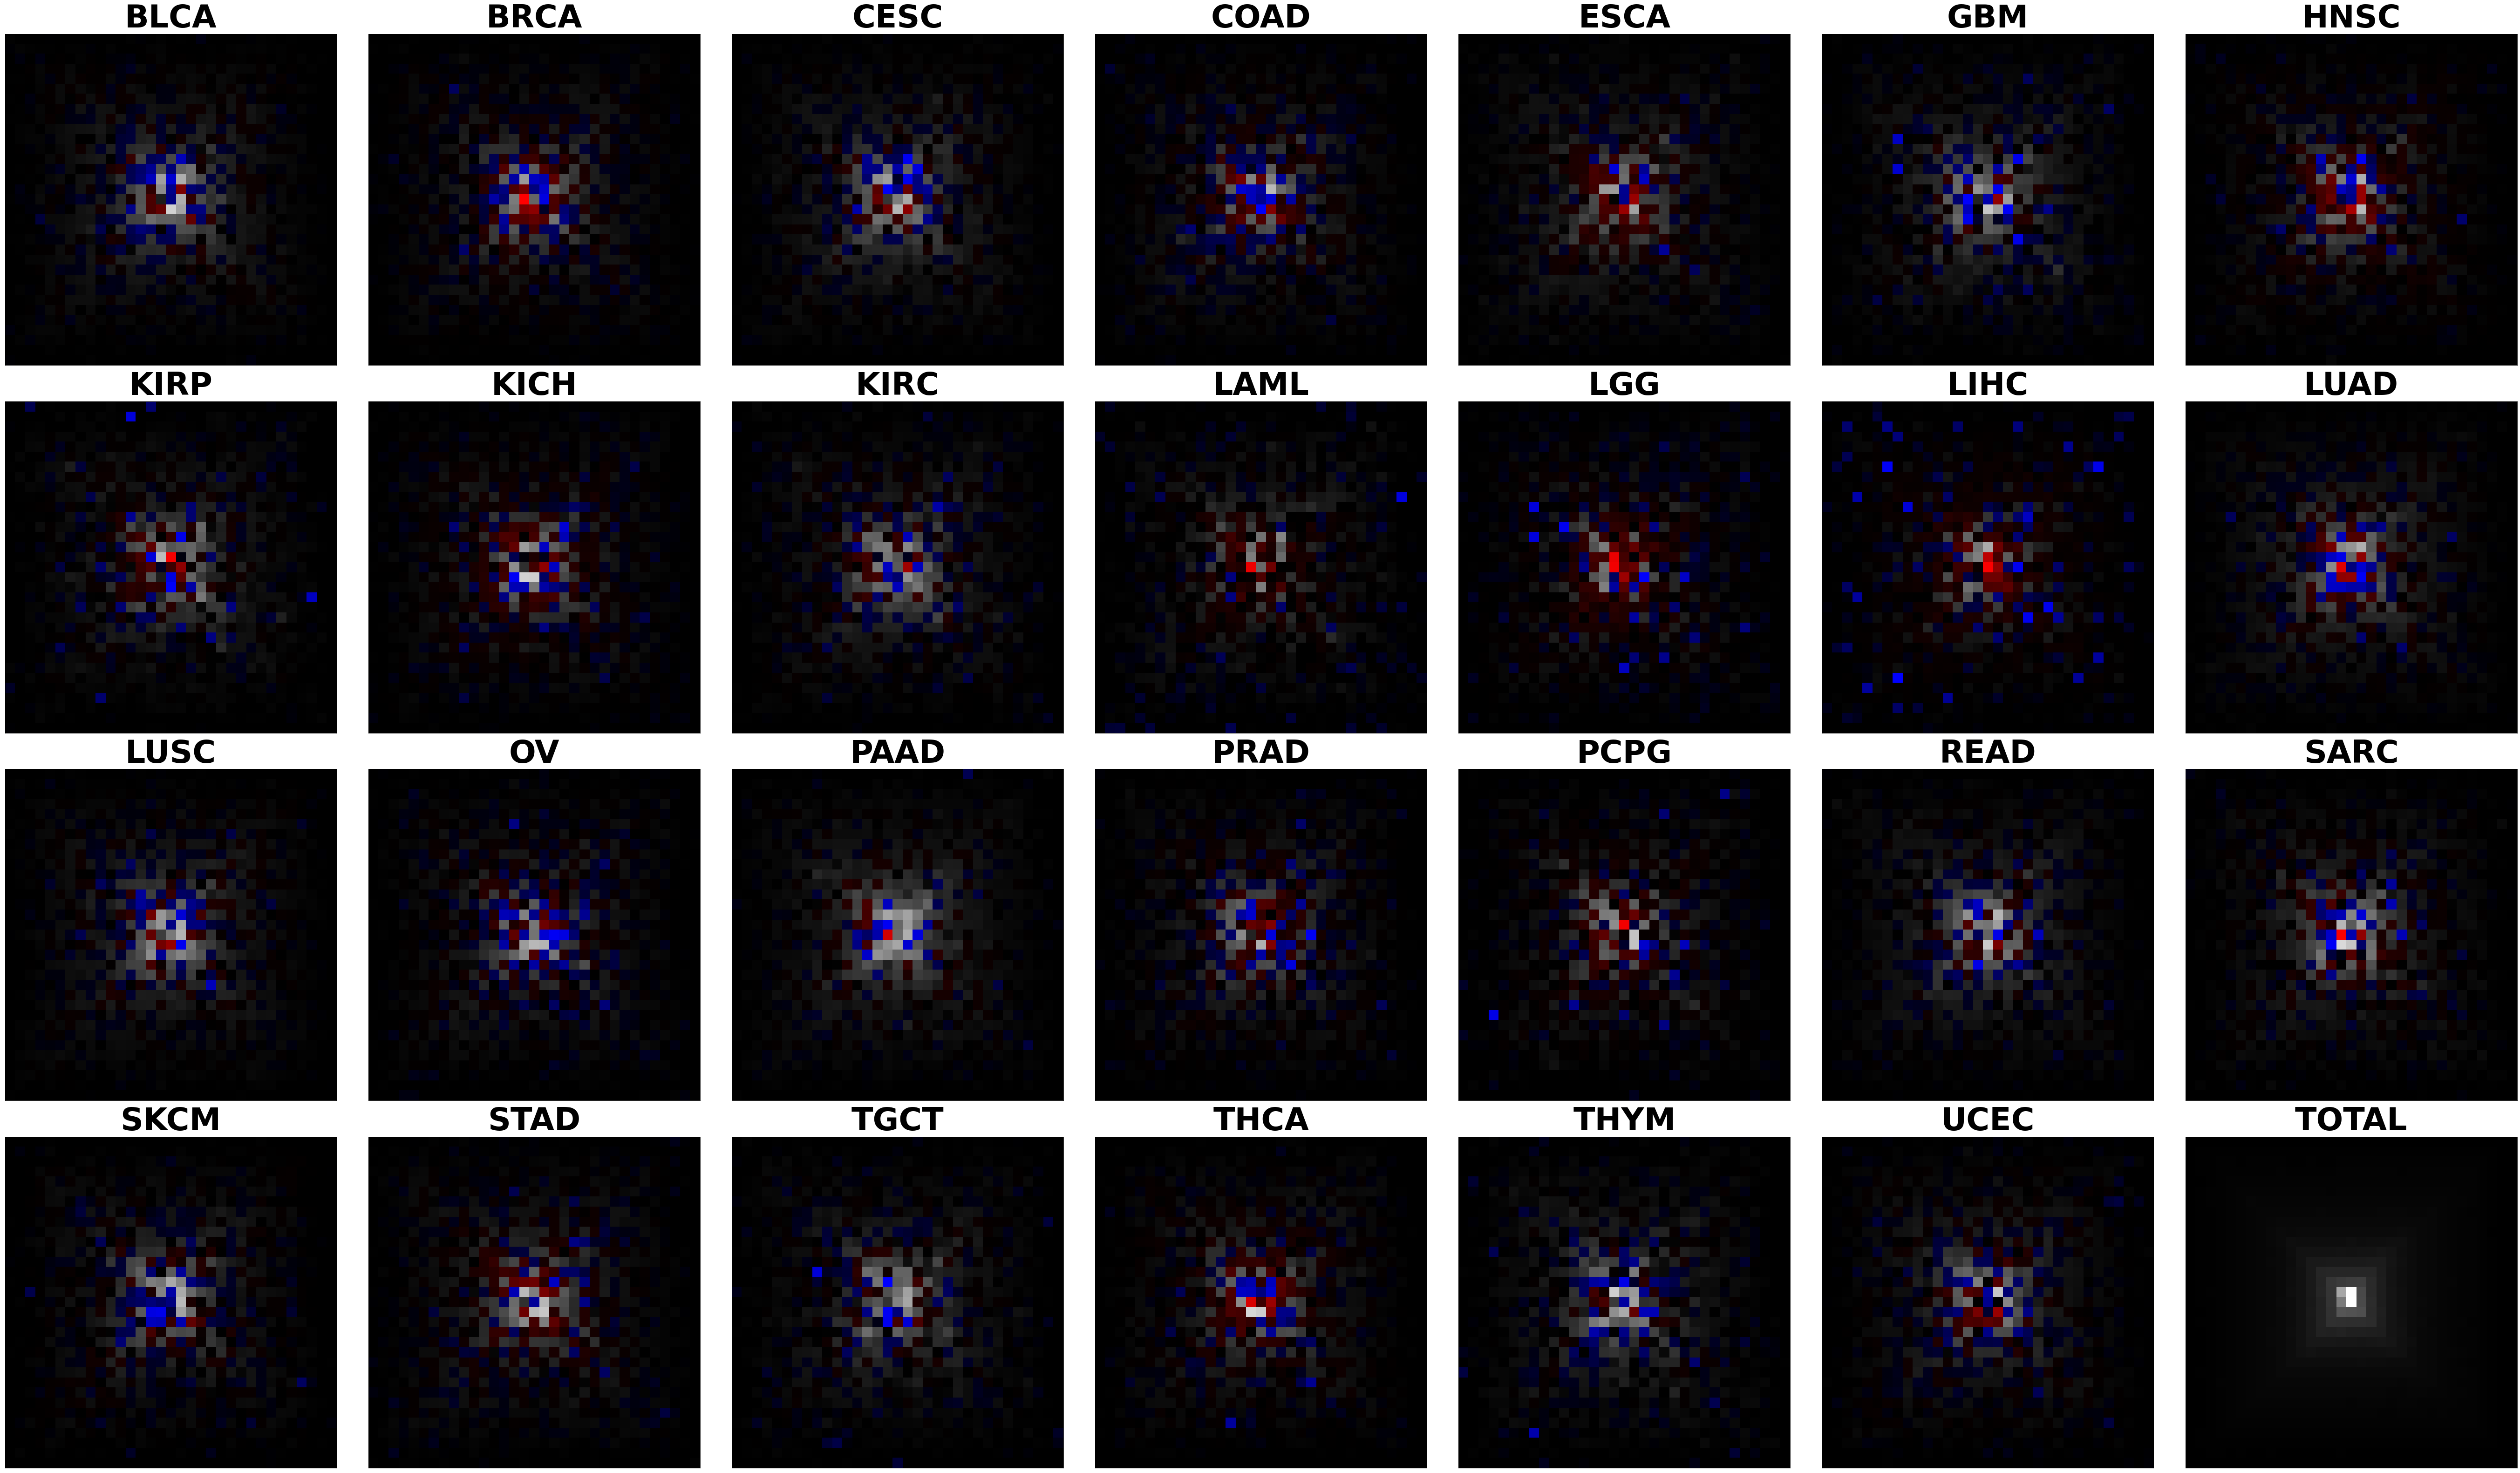

In [72]:
fig = plt.figure(figsize=(76, 44))
for i in range(28):
    ax = fig.add_subplot(4, 7, i+1, xticks=[], yticks=[])
    ax.imshow(imgcf8[i])
    ax.set_title(lll[i],pad = 14, fontdict={'weight':'bold','size':68})
        
plt.tight_layout()
plt.show()